<a href="https://colab.research.google.com/github/enricapq/ML-Data-Tutorials/blob/main/Multi_Armed_Bandit_Algorithms_course_implementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.udemy.com/course/practical-multi-armed-bandit-algorithms-in-python/learn/lecture/25839282#overview

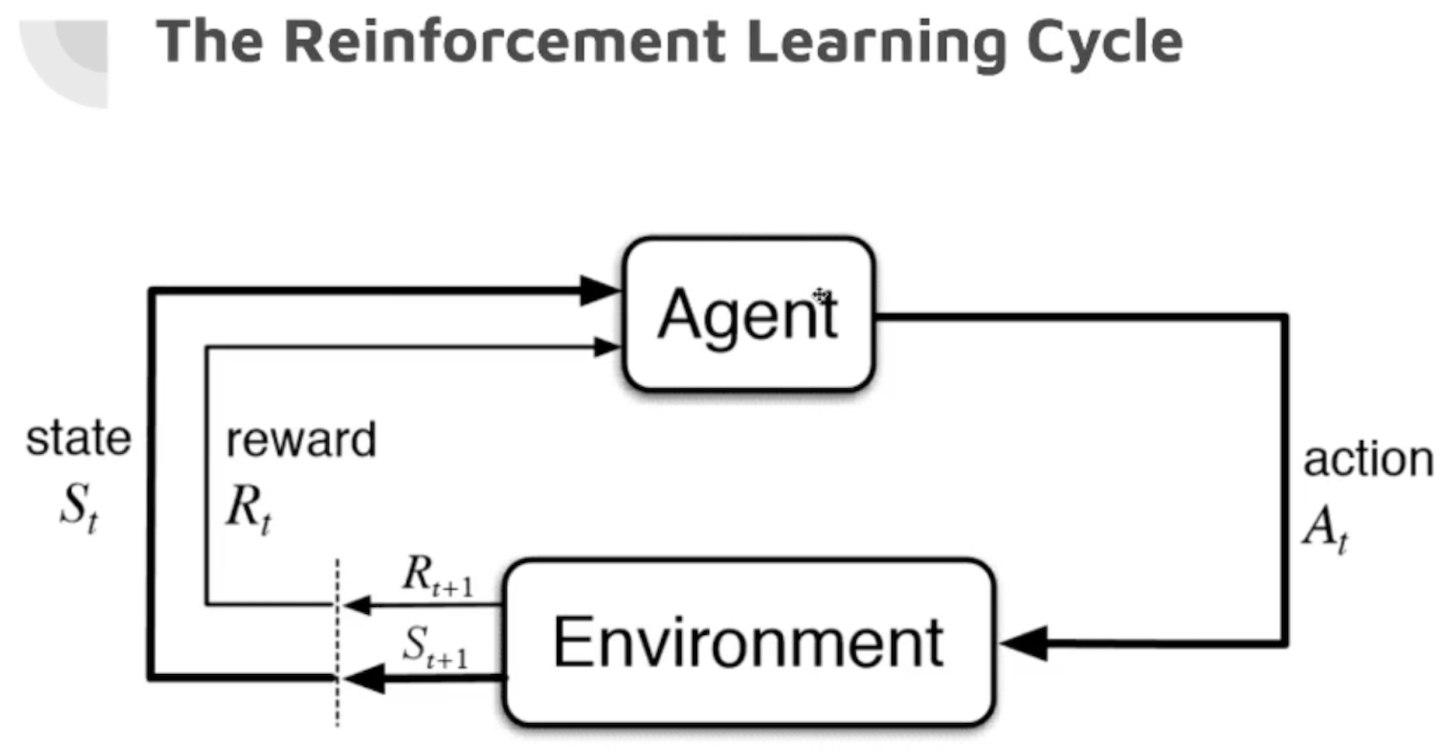

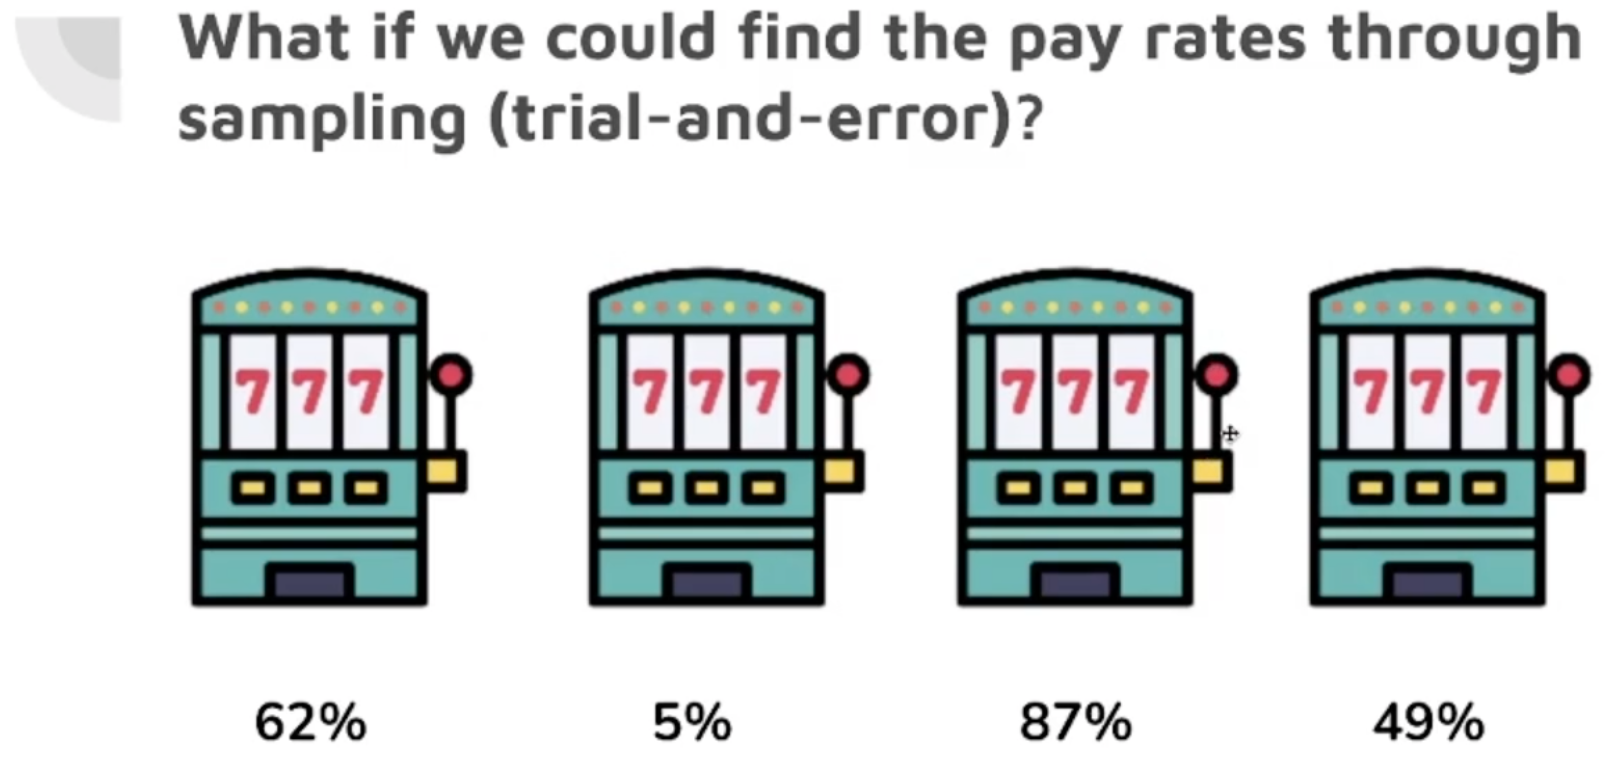

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Environment(object):
  """Simulator environment"""
  def __init__(self, reward_probabilities, actual_rewards):
    if len(reward_probabilities) != len(actual_rewards):
      raise Exception(f"size of reward probabilities : {len(reward_probabilities)} does not match size of actual rewards: {len(actual_rewards)}")
    # arms are the options in the environment
    # in real world reward_probabilities come from sampling
    self.reward_probabilities = reward_probabilities
    # actual reward is 1$
    self.actual_rewards = actual_rewards
    self.k_arms = len(reward_probabilities)
    
  def choose_arm(self, arm):
    """Action taken by the agent"""
    if arm < 0 or arm >= self.k_arms:
      raise Exception(f"arm must be between 0 and {self.k_arms}")
    
    return self.actual_rewards[arm] if np.random.random() < self.reward_probabilities[arm] else 0.0

In [3]:
env = Environment(reward_probabilities=[0.62, 0.05, 0.87, 0.49], actual_rewards=[1.0, 1.0, 1.0, 1.0])

In [4]:
[env.choose_arm(1) for _ in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [5]:
[env.choose_arm(2) for _ in range(10)]

[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]

In [6]:
[env.choose_arm(0) for _ in range(10)]

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]

In [7]:
[env.choose_arm(3) for _ in range(10)]

[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]

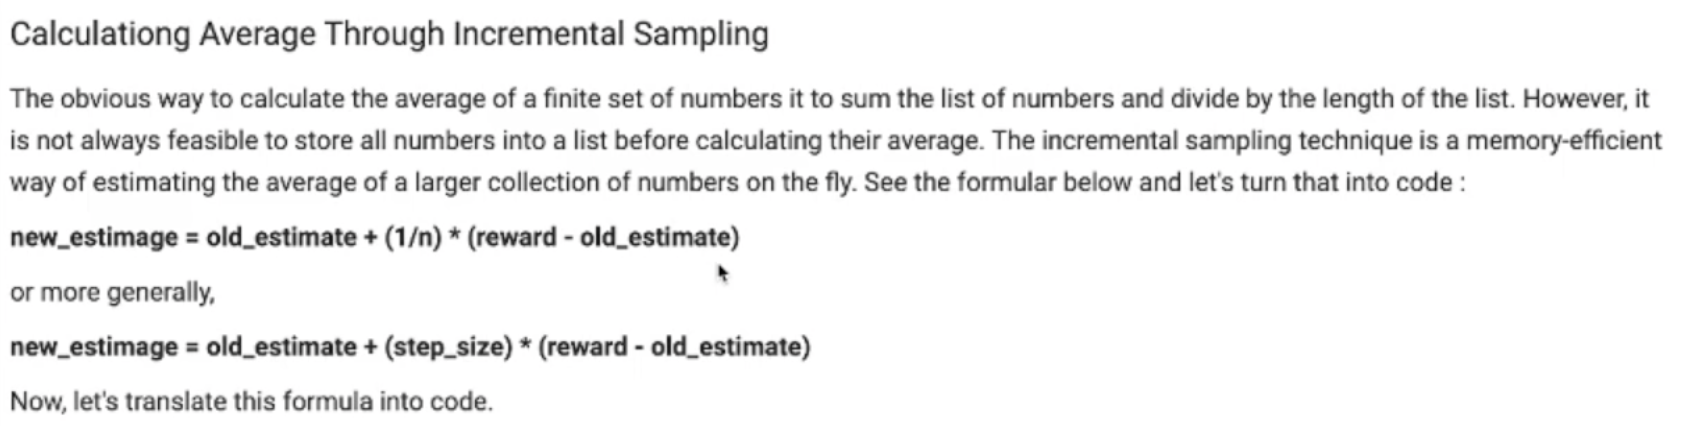

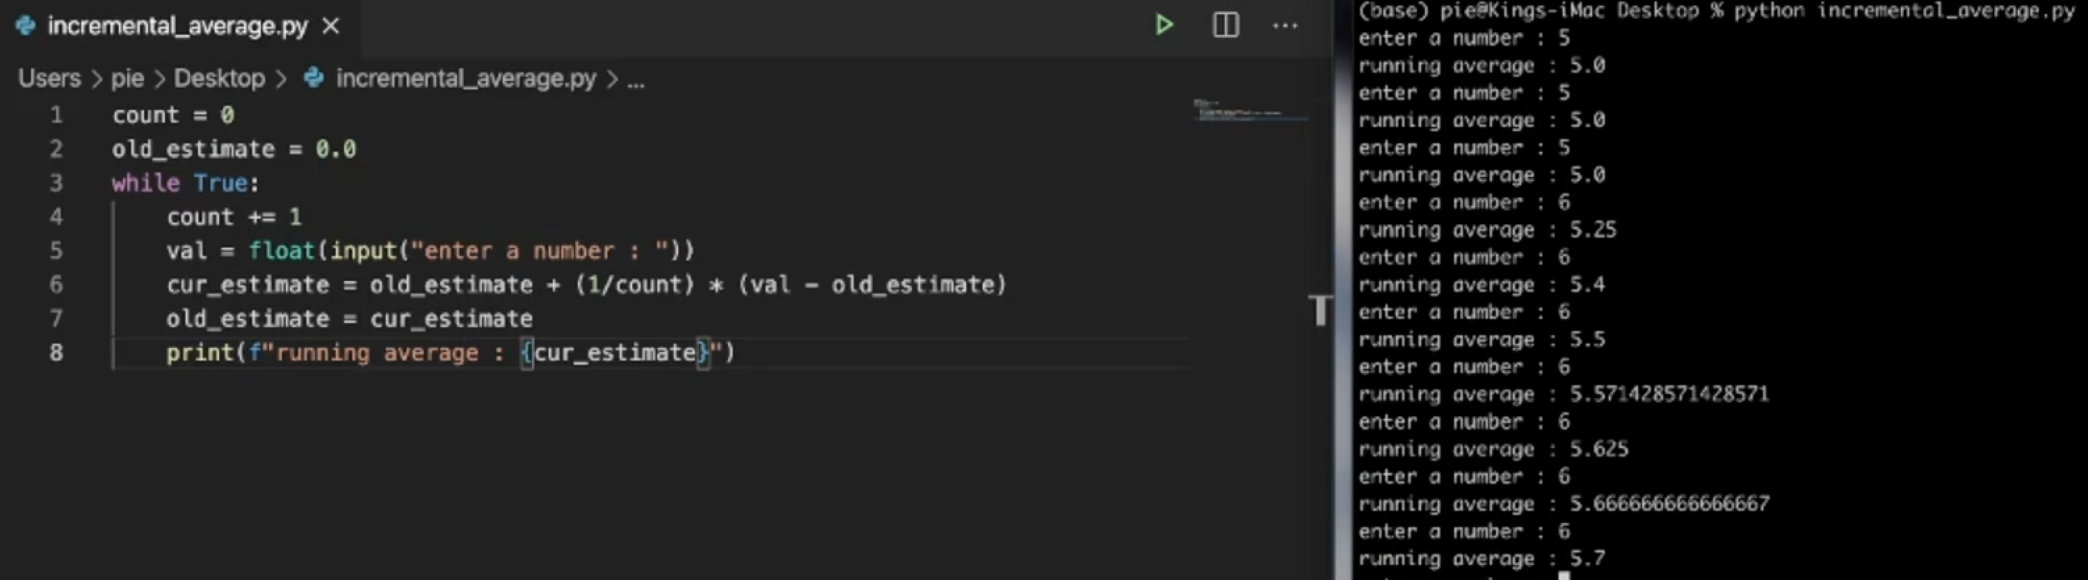

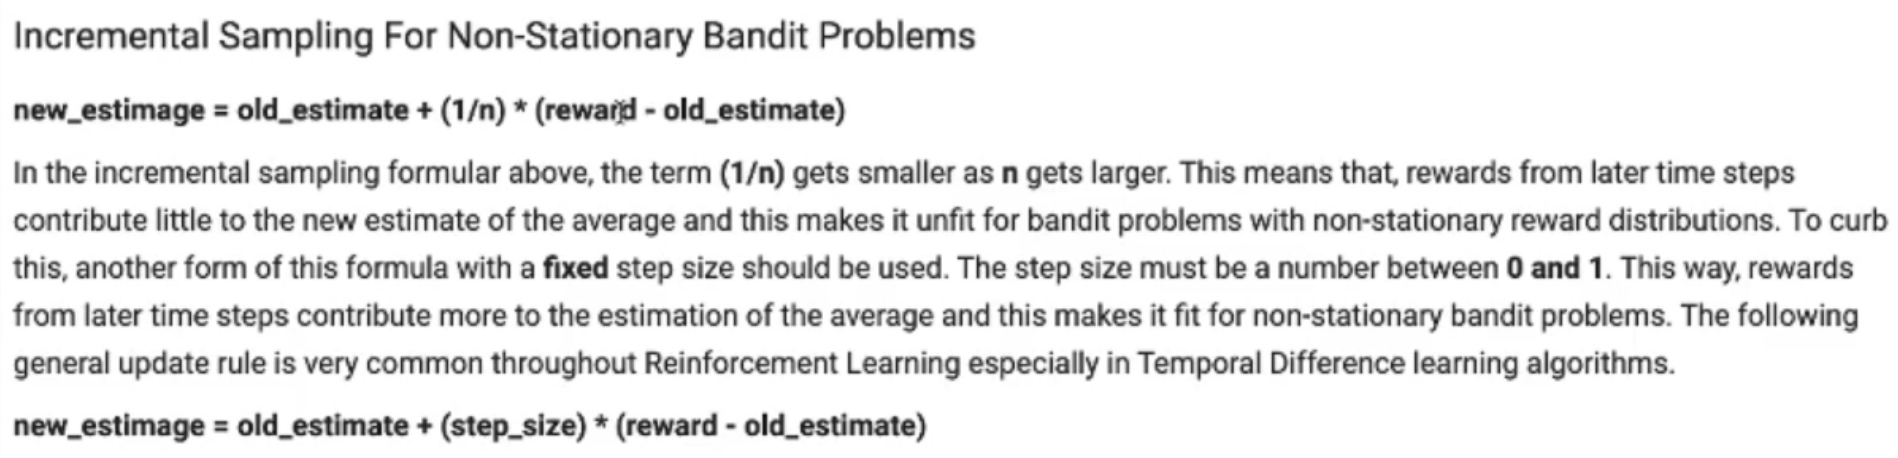

In [8]:
time_steps = np.arange(1,50)
weights = 1/time_steps
print(weights)

[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
 0.07692308 0.07142857 0.06666667 0.0625     0.05882353 0.05555556
 0.05263158 0.05       0.04761905 0.04545455 0.04347826 0.04166667
 0.04       0.03846154 0.03703704 0.03571429 0.03448276 0.03333333
 0.03225806 0.03125    0.03030303 0.02941176 0.02857143 0.02777778
 0.02702703 0.02631579 0.02564103 0.025      0.02439024 0.02380952
 0.02325581 0.02272727 0.02222222 0.02173913 0.0212766  0.02083333
 0.02040816]


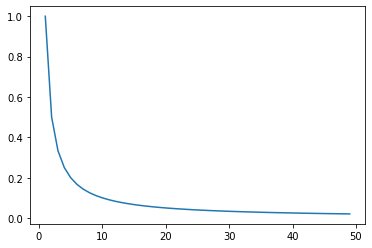

In [9]:
plt.plot(time_steps, weights)

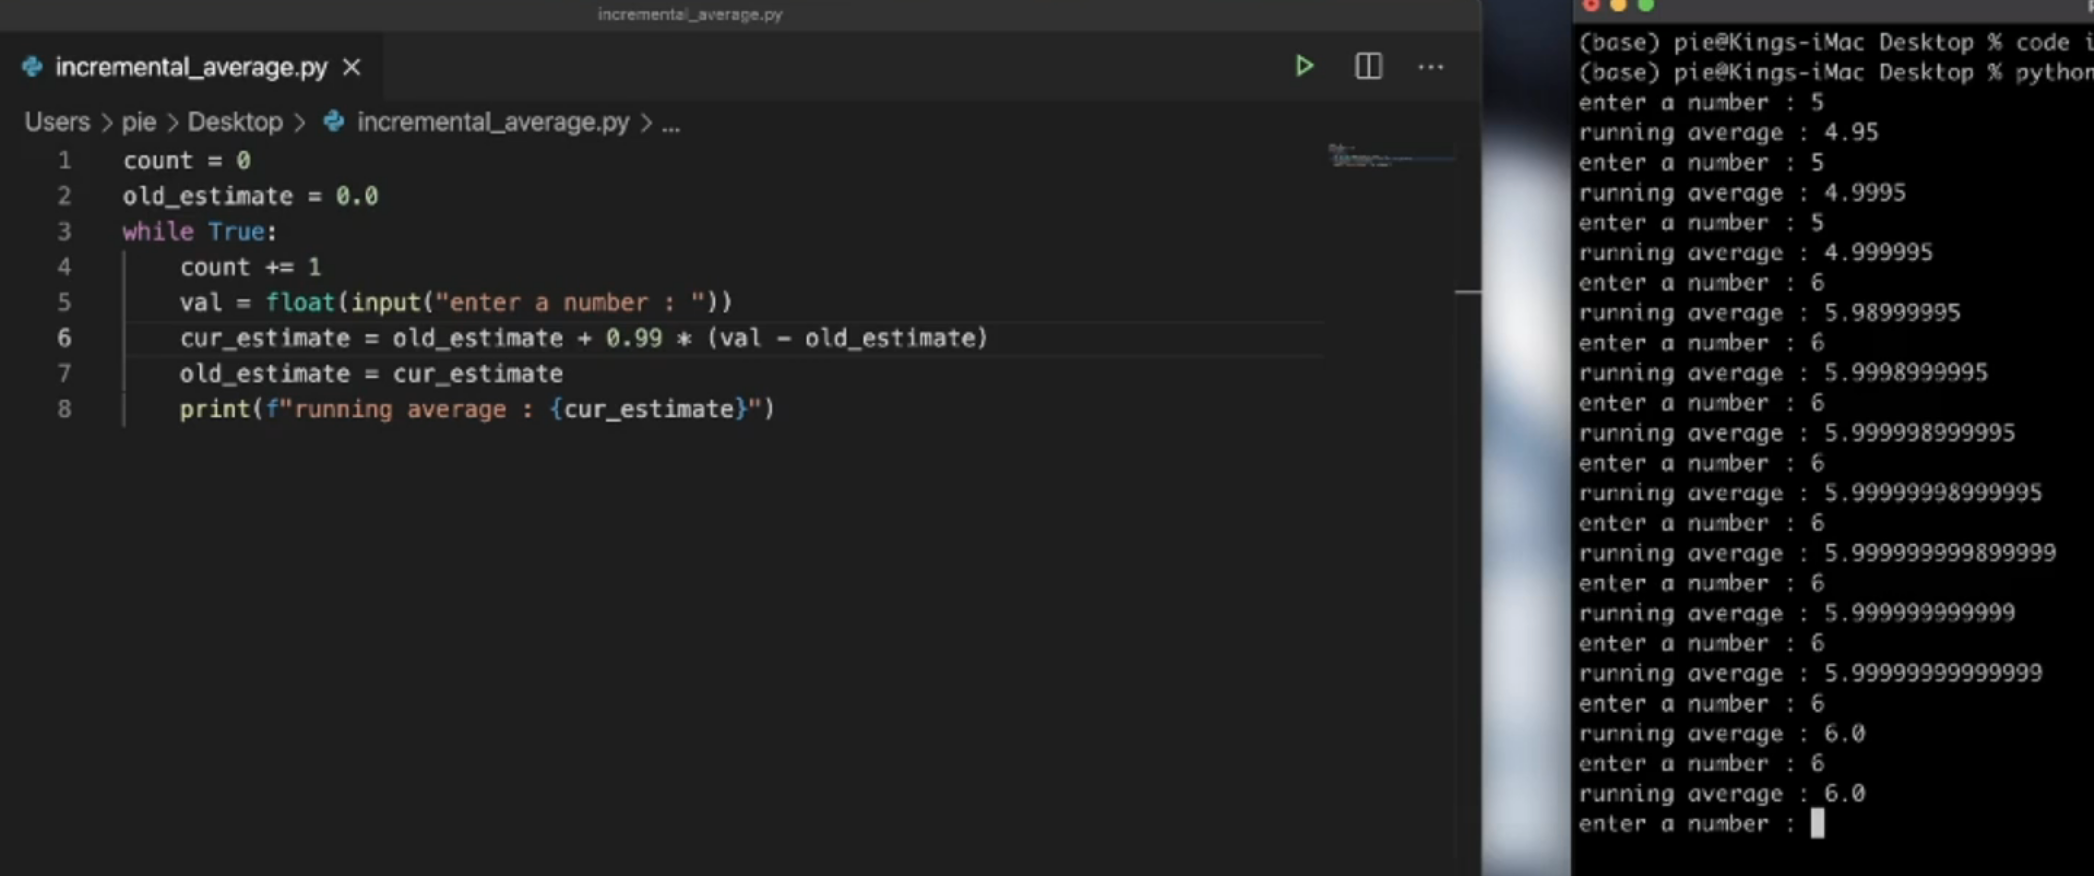

Implementing a Random-Behaving Agent

In [12]:
class RandomAgent(object):
  def __init__(self, env, max_iterations=500):
    self.env = env
    self.iterations = max_iterations

    # agent estimates the reward probability of each arm
    self.q_values = np.zeros(self.env.k_arms)
    # how many times each arm has been pulled
    self.arm_counts = np.zeros(self.env.k_arms)
    # total rewars from pulling each arm
    self.arm_rewards = np.zeros(self.env.k_arms)

    # actual reward that we get each time agent interacts with environment
    self.rewards = [0.0]
    # average of the rewards we get
    self.cum_rewards = [0.0]

  def act(self):
    # num of iterations with environment
    for i in range(self.iterations):
      # choose an arm randomly
      arm = np.random.choice(self.env.k_arms)
      # get reward from env
      reward = self.env.choose_arm(arm)
      # update arm count and total reward for that arm
      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      # update reward probability using simplest formula (1/n)
      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm] * (reward - self.q_values[arm]))
      self.rewards.append(reward)
      # cumulative rewards is expected to be close to 1
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}

In [13]:
# Create test environment
test_env = Environment(reward_probabilities=[0.62, 0.05, 0.87, 0.49], actual_rewards=[1.0, 1.0, 1.0, 1.0])
random_agent = RandomAgent(test_env)
random_agent_result = random_agent.act()

In [14]:
# if agent would be smart he should get closer to 500 (# of iterations, instead is only 259 as this is a baseline)
total_rewards = sum(random_agent_result["rewards"])
print(f"Total reward: {total_rewards}")

Total reward: 259.0


<BarContainer object of 4 artists>

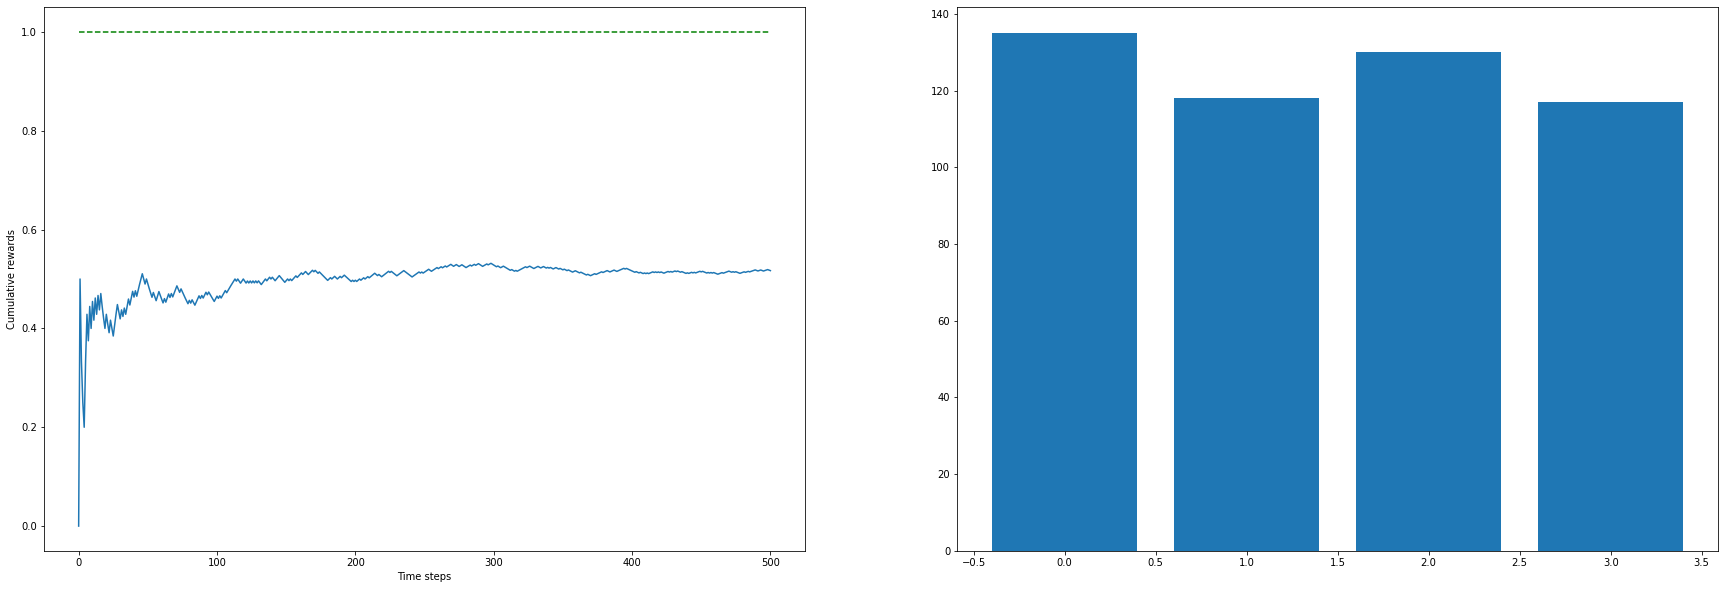

In [19]:
cum_rewards = random_agent_result["cum_rewards"]
arm_counts = random_agent_result["arm_counts"]

# plot to see how cumulative reward approaches the expected reward
fig = plt.figure(figsize=[30,10])

# plot Agent that is behaving randomly
ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(random_agent.iterations)], "g--", label="target cumulative reward")
ax1.plot(cum_rewards, label="cumulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cumulative rewards")

# plot how many times each arm has been pullet by the agent
ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)

In [23]:
# reward probab for each arm
print(f"Random Agent action values: {random_agent.q_values}")
print(f"Environment reward probabilities: {test_env.reward_probabilities}")

Random Agent action values: [0.62962963 0.02542373 0.89230769 0.47008547]
Environment reward probabilities: [0.62, 0.05, 0.87, 0.49]
